# Step 0 - Import Libraries

### ONLY RUN THIS CELL ONCE

In [3]:
pip install -q -r requirements.txt

DEPRECATION: Loading egg at /private/var/containers/Bundle/Application/A029C989-F01C-4C89-90F2-1B7D3778DAB7/Carnets-sci.app/Library/lib/python3.11/site-packages/statsmodels-0.13.5-py3.11-macosx-11.5-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /private/var/containers/Bundle/Application/A029C989-F01C-4C89-90F2-1B7D3778DAB7/Carnets-sci.app/Library/lib/python3.11/site-packages/jupyterlab-3.4.8-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /private/var/containers/Bundle/Application/A029C989-F01C-4C89-90F2-1B7D3778DAB7/Carnets-sci.app/Library/lib/python3.11/site-packages/rasterio-1.3.4-py3.11-macosx-11.5-x86_64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading eg

Note: you may need to restart the kernel to use updated packages.


### Libraries

In [26]:
#Importing all libraries
import os
import pandas as pd
%pylab inline
import seaborn as sns
import geopandas
import folium
from folium.plugins import HeatMap
import sys
import openpyxl
import datetime

import import_ipynb

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/private/var/containers/Bundle/Application/A029C989-F01C-4C89-90F2-1B7D3778DAB7/Carnets-sci.app/Library/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Step 0.1 - Import dataset here 🖍️

In [27]:
path = "Flourishing_248.xlsx"
data = pd.DataFrame()

if path.endswith('.csv'):
    data = pd.read_csv(path, index_col=0)

elif path.endswith('.xlsx') or path.endswith('.xls'):
    data = pd.read_excel(path)

elif path.endswith('.txt'):
    data = pd.read_csv(path, sep='*', encoding='latin')

else:
    print(f"Unsupported file format. Please provide a .csv or .xlsx file")
    
if data is not None:
    print(f"Dataframe {path} loaded successfully! 👍")

Dataframe Flourishing_248.xlsx loaded successfully! 👍


In [28]:
def create_directory_and_files(path):
    # Remove the file extension from the path
    file_name = os.path.splitext(os.path.basename(path))[0]

    # Create the main directory with the file_name
    main_dir_name = file_name
    if not os.path.exists(main_dir_name):
        os.mkdir(main_dir_name)

    # Initialize a counter for directory and file numbering
    counter = 1

    while True:
        # Generate directory name with a zero-padded number
        dir_name = f"{main_dir_name}_{counter:02}"
        try:
            # Try to create the directory inside the main directory
            os.mkdir(os.path.join(main_dir_name, dir_name))

            # Generate the file name
            file_name_with_counter = f"{file_name}_analysis_{counter:02}.txt"
            file_path = os.path.join(main_dir_name, dir_name, file_name_with_counter)

            # Create and open the text file for writing
            with open(file_path, 'w') as txt_file:
                pass  # Do nothing, just create an empty file

            # Set the output_file and output_dir variables
            output_file = file_path
            output_dir = os.path.abspath(os.path.join(main_dir_name, dir_name))

            return output_file, output_dir
        except FileExistsError:
            # If the directory already exists, increment the counter and try the next number
            counter += 1


output_file, output_dir = create_directory_and_files(path)
print(f"Output File: {output_file}")
print(f"Output Directory: {output_dir}")

Output File: Flourishing_248/Flourishing_248_01/Flourishing_248_analysis_01.txt
Output Directory: /private/var/mobile/Library/Mobile Documents/com~apple~CloudDocs/EM Lyon/AI Booster/03_Introduction to Machine Learning/Flourishing_248/Flourishing_248_01


In [29]:
datac = data.copy()

# Step 1 - Data Frame Observation

## 1.1 - Dataframe type

In [30]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          248 non-null    int64  
 1   age         248 non-null    int64  
 2   education   248 non-null    int64  
 3   sex         248 non-null    int64  
 4   famstatus   248 non-null    int64  
 5   pro_cat     248 non-null    int64  
 6   pro_quant   248 non-null    int64  
 7   priv_cat    248 non-null    int64  
 8   priv_quant  248 non-null    int64  
 9   positivity  248 non-null    float64
 10  flow        248 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 21.4 KB


In [31]:
datac.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


## 1.2 - Features type consistency

In [32]:
# Initialize a dictionary to store type consistency results
type_consistency = {}

# Iterate through DataFrame columns
for column in datac:
    # Get the unique data types in the column
    unique_types = datac[column].apply(type).unique()
    
    # Check if there's more than one unique data type
    if len(unique_types) == 1:
        type_consistency[column] = f"🟢 {column}: Consistent ({unique_types[0].__name__})"
    else:
        type_consistency[column] = f"🔴 {column}: Inconsistent ({', '.join(t.__name__ for t in unique_types)})"

# Print the type consistency results for each feature
for consistency in type_consistency.values():
    print(consistency)
    #output_file.write(consistency)

🟢 ID: Consistent (int)
🟢 age: Consistent (int)
🟢 education: Consistent (int)
🟢 sex: Consistent (int)
🟢 famstatus: Consistent (int)
🟢 pro_cat: Consistent (int)
🟢 pro_quant: Consistent (int)
🟢 priv_cat: Consistent (int)
🟢 priv_quant: Consistent (int)
🟢 positivity: Consistent (float)
🟢 flow: Consistent (int)


## 1.3 - Dataframe Type Conversion

In [33]:
# Dictionary to map the first letter to the complete data type name
data_type_mapping = {
    'i': 'int',
    'int': 'int',
    'f': 'float',
    'float': 'float',
    's': 'string',
    'string': 'string',
    'skip': 'skip',
    'k': 'skip',
    '': 'skip',
    'stop':'stop'
}



def label_values(column):
    unique_values = sorted(column.unique())  # Sort unique numerical values
    value_labels = {}

    for value in unique_values:
        label = input(f"Enter label for value '{value}': ")
        value_labels[value] = label

    return value_labels



for column in datac.columns:
    print(f"🔵 SELECTED - '{column}' column of type '{datac[column].dtype}' ...")
    
    
    
    # Show an overview of unique values in the column
    unique_values = sorted(datac[column].unique())
    num_unique_values = len(unique_values)
    max_values_to_display = 10  # Limit the number of values to display
    
    print(f"\n ▪️ Overview of unique values:")
    if num_unique_values <= max_values_to_display:
        for value in unique_values:
            print(f"   * '{value}'")
    else:
        for i, value in enumerate(unique_values[:max_values_to_display]):
            print(f"   * '{value}'")
        print(f"   ... and {num_unique_values - max_values_to_display} more unique values")
    
    
    
    # Prompt the user for the desired data type
    data_type_input = input(f" ❔ Enter the desired data type for '{column}' (int / float / string / skip / stop): ").strip().lower()
    
    # Get the complete data type name from the mapping for comparison with user input
    data_type = data_type_mapping.get(data_type_input)
    
    if data_type:
        
        # Skip conversion
        if data_type == 'skip':
            print(f" ⏩ SKIPPING - '{column}' column will not be converted\n\n")
            continue
        
        # Convert to INT
        elif data_type == 'int':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().apply(lambda x: int(x) if not pd.isna(x) else np.nan)
        
        # Convert to FLOAT
        elif data_type == 'float':
            if datac[column].dtype == object:  # Check if the column contains string data
                datac[column] = pd.to_numeric(datac[column].astype(str).str.replace('[^\d.]', '', regex=True), errors='coerce')
            datac[column] = datac[column].round().astype(float)  # Always round for 'float'

        # Convert to STRING
        elif data_type == 'string':
            datac[column] = datac[column].astype(str)

            # Ask if the user wants to label values
            label_values_option = input(f" ❔ CONVERT TO STRING - Do you want to label values in '{column}' to create categorical data? (yes/no): ").strip().lower()
            
            if label_values_option == 'yes':
                value_labels = label_values(datac[column])
                datac[column].replace(value_labels, inplace=True)
        
        # Stop the loop
        elif data_type == 'stop':
            print(f"\n ⏩ STOPPING - Skipping all remaining features")
            break
    
    # Error Handling
    else:
        print(f" ❗️ ERROR - Unsupported data type '{data_type_input}'")
        print(f" ⏩ SKIPPING - Skipping conversion for '{column}'\n\n")
        continue

    
    # Check if there are NaN values after conversion
    if datac[column].isna().any():
        print(f" ⚠️ Warning: NaN values found in '{column}' after conversion")
    
    print(f"\n ✅ CONVERTED - '{column}' column converted to {data_type}\n\n")

# Display the modified DataFrame
print(f"\n\n🆕 Modified DataFrame:")
print(datac)

🔵 SELECTED - 'ID' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '1'
   * '3'
   * '4'
   * '7'
   * '8'
   * '9'
   * '10'
   * '11'
   * '13'
   * '15'
   ... and 238 more unique values
 ❔ Enter the desired data type for 'ID' (int / float / string / skip / stop): 
 ⏩ SKIPPING - 'ID' column will not be converted


🔵 SELECTED - 'age' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '20'
   * '23'
   * '25'
   * '27'
   * '28'
   * '29'
   * '30'
   * '31'
   * '32'
   * '33'
   ... and 34 more unique values
 ❔ Enter the desired data type for 'age' (int / float / string / skip / stop): 
 ⏩ SKIPPING - 'age' column will not be converted


🔵 SELECTED - 'education' column of type 'int64' ...

 ▪️ Overview of unique values:
   * '1'
   * '2'
   * '3'
   * '4'
   * '5'
   * '6'
 ❔ Enter the desired data type for 'education' (int / float / string / skip / stop): s
 ❔ CONVERT TO STRING - Do you want to label values in 'education' to create categorical data? (yes/

## 1.4 - Describe numerical features

In [42]:
datac.describe(percentiles=[.01, .25, .5, .75, .99])

,ID,age,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,245.201613,41.685484,1.608871,2.536290,2.052419,50.612903,2.225806,55.987903,1.812982,32.951613
std,155.254472,10.154568,0.488990,0.757348,0.597967,13.431614,0.537481,11.613367,0.803469,6.599417
min,1.000000,20.000000,1.000000,1.000000,1.000000,21.000000,1.000000,23.000000,0.384615,13.000000
1%,5.410000,23.000000,1.000000,1.000000,1.000000,22.000000,1.000000,27.470000,0.531118,16.940000
25%,107.500000,34.000000,1.000000,2.000000,2.000000,41.000000,2.000000,48.000000,1.272727,29.000000
50%,229.000000,40.000000,2.000000,3.000000,2.000000,50.000000,2.000000,56.000000,1.720000,33.000000
75%,387.500000,49.000000,2.000000,3.000000,2.000000,61.000000,3.000000,64.000000,2.170455,37.000000
99%,509.060000,65.060000,2.000000,3.000000,3.000000,79.000000,3.000000,82.000000,4.431667,47.530000
max,513.000000,72.000000,2.000000,3.000000,3.000000,82.000000,3.000000,83.000000,5.000000,48.000000


## 1.5 - Describe categorical features

In [43]:
try:
    print(datac.describe(include='object'))
except ValueError:
    print("🟨 Warning! There are no categorical features in this DataSet!")

        education
count         248
unique          6
top     5 Years +
freq          110


# Step 2 - Univariate Analysis

## 2.1 - Numerical Univariate Analysis

🔵 Feature : ID

Central tendency measurement :
 * Mean:  245.2016129032258
 * Median:  229.0

Dispersion measurement :
 * Variance:  24006.75773933403
 * Standard deviation:  154.94114282311858

Shape measurement :
 * Skewness:  0.14475609908747927
 * Kurtosis:  -1.2960072436932533

P1 and P99 :
 * P1:  5.41
 * P5:  23.35
 * P25:  107.5
 * P50:  229.0
 * P75:  387.5
 * P95:  489.65
 * P99:  509.06

Outlier test :
✅ No outliers detected.


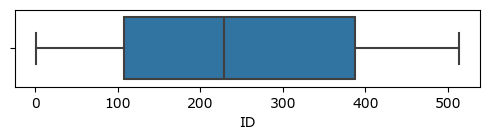

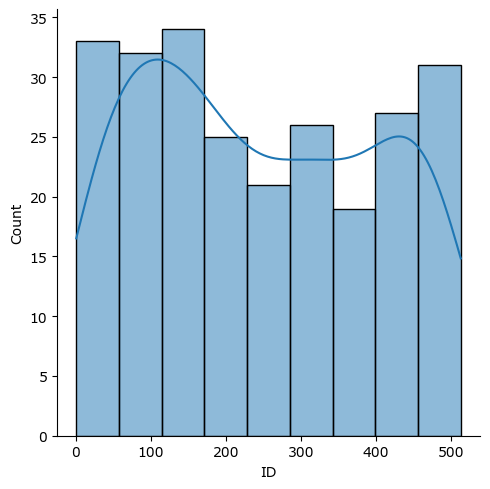

------------------------------





🔵 Feature : age

Central tendency measurement :
 * Mean:  41.685483870967744
 * Median:  40.0

Dispersion measurement :
 * Variance:  102.69946670135276
 * Standard deviation:  10.13407453600736

Shape measurement :
 * Skewness:  0.44166550998344933
 * Kurtosis:  -0.44131055588000034

P1 and P99 :
 * P1:  23.0
 * P5:  28.0
 * P25:  34.0
 * P50:  40.0
 * P75:  49.0
 * P95:  59.64999999999998
 * P99:  65.06

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
    ID  age  education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
0  344   72  5 Years +    2          2        3         82         3   

   priv_quant  positivity  flow  
0          83    4.142857    44  



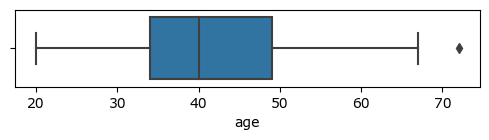

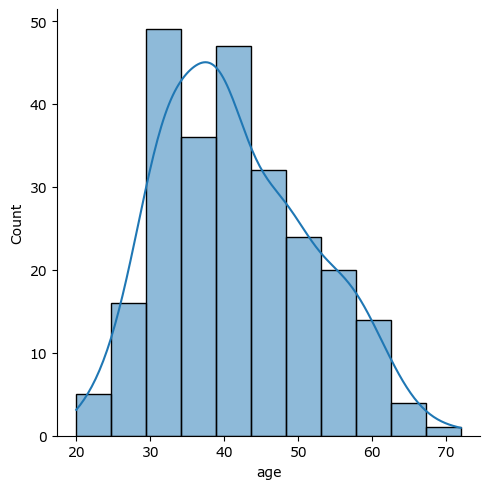

------------------------------





🔵 Feature : sex

Central tendency measurement :
 * Mean:  1.6088709677419355
 * Median:  2.0

Dispersion measurement :
 * Variance:  0.2381471123829344
 * Standard deviation:  0.4880031889065218

Shape measurement :
 * Skewness:  -0.44890932714514753
 * Kurtosis:  -1.813168522083477

P1 and P99 :
 * P1:  1.0
 * P5:  1.0
 * P25:  1.0
 * P50:  2.0
 * P75:  2.0
 * P95:  2.0
 * P99:  2.0

Outlier test :
✅ No outliers detected.


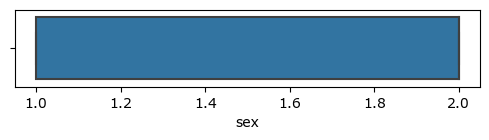

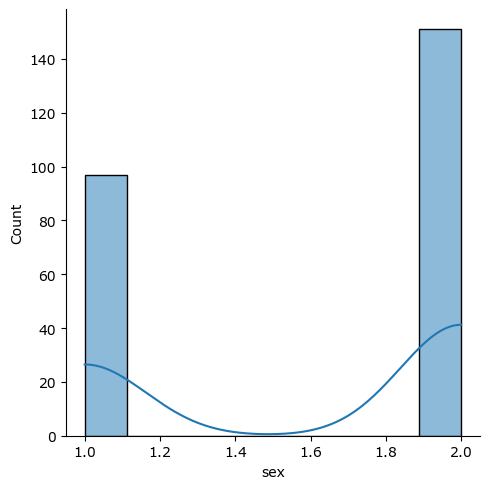

------------------------------





🔵 Feature : famstatus

Central tendency measurement :
 * Mean:  2.536290322580645
 * Median:  3.0

Dispersion measurement :
 * Variance:  0.5712636576482831
 * Standard deviation:  0.7558198579346028

Shape measurement :
 * Skewness:  -1.2513854992930311
 * Kurtosis:  -0.0899612647763286

P1 and P99 :
 * P1:  1.0
 * P5:  1.0
 * P25:  2.0
 * P50:  3.0
 * P75:  3.0
 * P95:  3.0
 * P99:  3.0

Outlier test :
✅ No outliers detected.


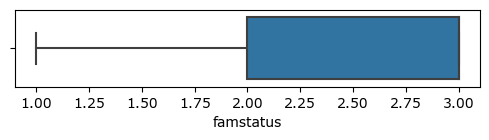

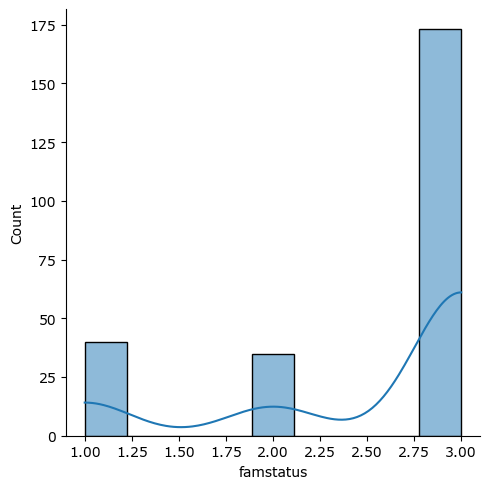

------------------------------





🔵 Feature : pro_cat

Central tendency measurement :
 * Mean:  2.0524193548387095
 * Median:  2.0

Dispersion measurement :
 * Variance:  0.356123178980229
 * Standard deviation:  0.5967605708994429

Shape measurement :
 * Skewness:  -0.017648424290321436
 * Kurtosis:  -0.1902250278972768

P1 and P99 :
 * P1:  1.0
 * P5:  1.0
 * P25:  2.0
 * P50:  2.0
 * P75:  2.0
 * P95:  3.0
 * P99:  3.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
     ID  age       education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
0   344   72       5 Years +    2          2        3         82         3   
1   317   45       5 Years +    2          2        3         81         3   
2   444   43         4 Years    1          1        3         79         3   
3   270   60     High School    2          3        3         79         3   
4    52   49     High School    2          2        3         77         3   
5   141   35         3 Years    2        

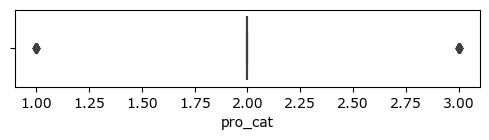

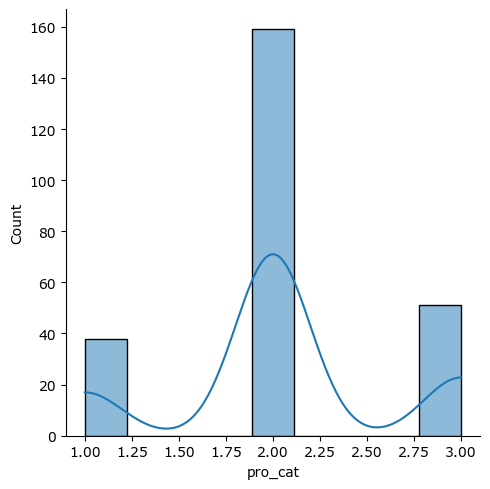

------------------------------





🔵 Feature : pro_quant

Central tendency measurement :
 * Mean:  50.61290322580645
 * Median:  50.0

Dispersion measurement :
 * Variance:  179.68080124869928
 * Standard deviation:  13.404506751413843

Shape measurement :
 * Skewness:  0.049480538040877646
 * Kurtosis:  -0.584486642513387

P1 and P99 :
 * P1:  22.0
 * P5:  29.35
 * P25:  41.0
 * P50:  50.0
 * P75:  61.0
 * P95:  73.0
 * P99:  79.0

Outlier test :
✅ No outliers detected.


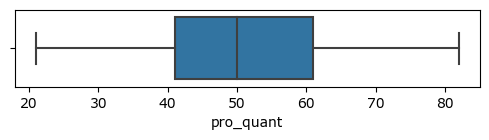

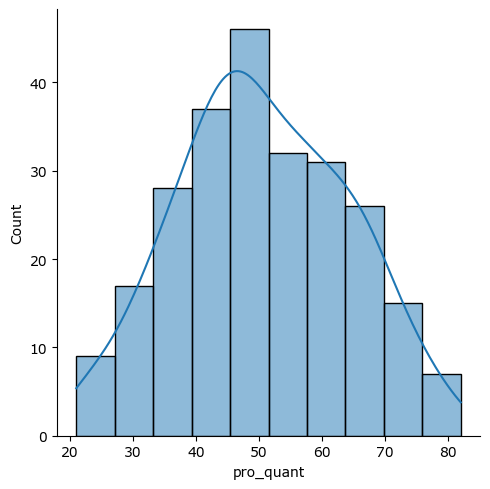

------------------------------





🔵 Feature : priv_cat

Central tendency measurement :
 * Mean:  2.225806451612903
 * Median:  2.0

Dispersion measurement :
 * Variance:  0.2877211238293445
 * Standard deviation:  0.5363964241392223

Shape measurement :
 * Skewness:  0.1263713121858877
 * Kurtosis:  -0.1944889822885183

P1 and P99 :
 * P1:  1.0
 * P5:  1.0
 * P25:  2.0
 * P50:  2.0
 * P75:  3.0
 * P95:  3.0
 * P99:  3.0

Outlier test :
✅ No outliers detected.


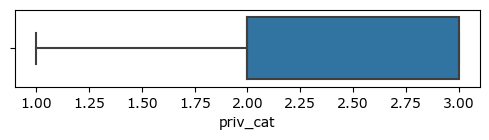

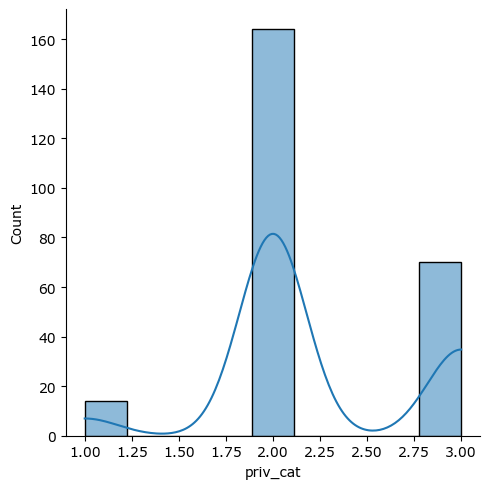

------------------------------





🔵 Feature : priv_quant

Central tendency measurement :
 * Mean:  55.98790322580645
 * Median:  56.0

Dispersion measurement :
 * Variance:  134.3264665712799
 * Standard deviation:  11.58992953262788

Shape measurement :
 * Skewness:  -0.22109393513618109
 * Kurtosis:  -0.2603818263551312

P1 and P99 :
 * P1:  27.47
 * P5:  36.35
 * P25:  48.0
 * P50:  56.0
 * P75:  64.0
 * P95:  73.64999999999998
 * P99:  82.0

Outlier test :
🚨 Warning Outliers detected:

 * Low outliers:
    ID  age  education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
75  56   38  5 Years +    1          1        2         41         1   

    priv_quant  positivity  flow  
75          23    0.764706    18  


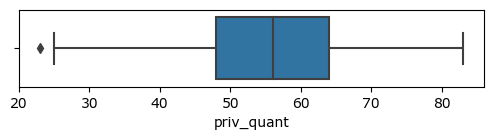

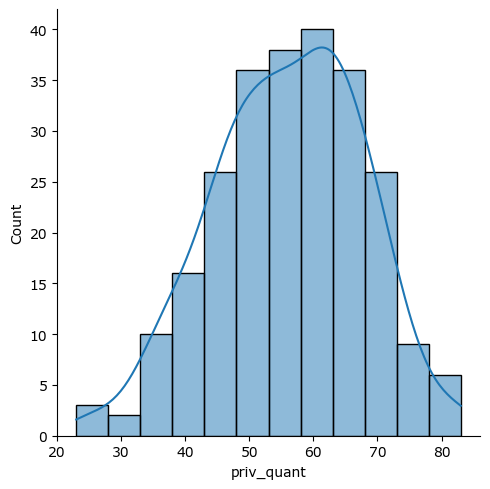

------------------------------





🔵 Feature : positivity

Central tendency measurement :
 * Mean:  1.8129822540932454
 * Median:  1.72

Dispersion measurement :
 * Variance:  0.6429592051625669
 * Standard deviation:  0.8018473702410995

Shape measurement :
 * Skewness:  1.0959322654938788
 * Kurtosis:  1.7791869761605348

P1 and P99 :
 * P1:  0.5311175710594315
 * P5:  0.7142857142857143
 * P25:  1.2727272727272725
 * P50:  1.72
 * P75:  2.170454545454546
 * P95:  3.3044117647058795
 * P99:  4.4316666666666675

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
      ID  age    education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
0    344   72    5 Years +    2          2        3         82         3   
1    317   45    5 Years +    2          2        3         81         3   
2    444   43      4 Years    1          1        3         79         3   
3    270   60  High School    2          3        3         79         3   
6    456   51    5 Years +    2       

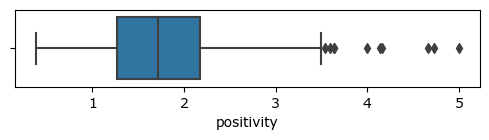

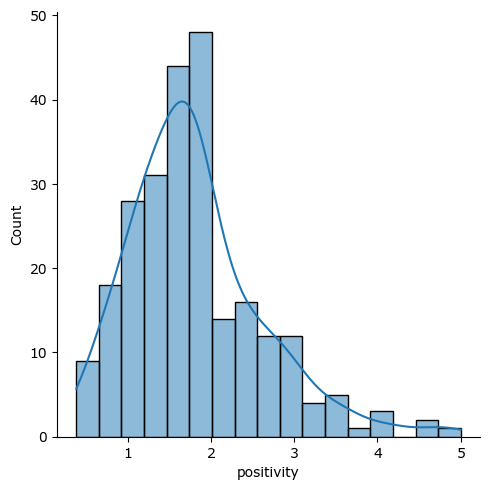

------------------------------





🔵 Feature : flow

Central tendency measurement :
 * Mean:  32.95161290322581
 * Median:  33.0

Dispersion measurement :
 * Variance:  43.376690946930275
 * Standard deviation:  6.586098309844021

Shape measurement :
 * Skewness:  -0.15879555934177014
 * Kurtosis:  -0.10924337059990119

P1 and P99 :
 * P1:  16.94
 * P5:  22.0
 * P25:  29.0
 * P50:  33.0
 * P75:  37.0
 * P95:  44.0
 * P99:  47.53

Outlier test :
🚨 Warning Outliers detected:

 * Low outliers:
      ID  age  education  sex  famstatus  pro_cat  pro_quant  priv_cat  \
69    13   32  5 Years +    2          3        2         35         1   
153  252   31  5 Years +    2          1        2         47         2   
219  460   27  5 Years +    1          1        1         35         2   

     priv_quant  positivity  flow  
69           38    0.645161    14  
153          54    1.416667    16  
219          48    0.870968    13  


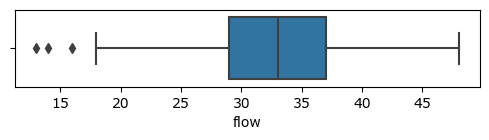

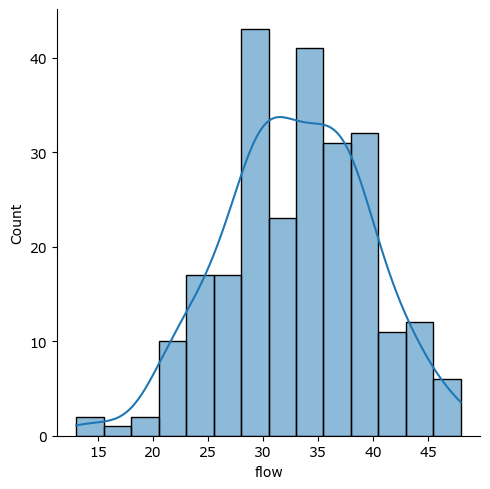

------------------------------





Finished! :D


In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = datac.select_dtypes(include=np.number).columns

for c in numerical_features:
    print(f"🔵 Feature : {c}\n")
    
    # Central tendency measurement
    print("Central tendency measurement :")
    print(" * Mean: ", datac[c].mean())
    print(" * Median: ", datac[c].median())
    
    # Dispersion measurement
    print("\nDispersion measurement :")
    print(" * Variance: ", datac[c].var(ddof=0))
    print(" * Standard deviation: ", datac[c].std(ddof=0))
    
    if (datac[c].mean() * datac[c].std(ddof=0)) >= 0 and datac[c].std(ddof=0) >= datac[c].mean():
        print(f"🚨 Warning Standard deviation {datac[c].std(ddof=0) / datac[c].mean() * 100} times bigger than mean")
    
    # Shape measurement
    print("\nShape measurement :")
    print(" * Skewness: ", datac[c].skew())
    print(" * Kurtosis: ", datac[c].kurtosis())
    
    # P1 and P99
    Q1 = datac[c].quantile(0.25)
    Q3 = datac[c].quantile(0.75)
    print("\nP1 and P99 :")
    print(" * P1: ", datac[c].quantile(0.01))
    print(" * P5: ", datac[c].quantile(0.05))
    print(" * P25: ", Q1)
    print(" * P50: ", datac[c].quantile(0.50))
    print(" * P75: ", Q3)
    print(" * P95: ", datac[c].quantile(0.95))
    print(" * P99: ", datac[c].quantile(0.99))
    
    # Outlier test
    print("\nOutlier test :")
    IQR = Q3 - Q1
    
    high_outliers = datac[(datac[c] > Q3 + 1.5 * IQR)]
    low_outliers = datac[(datac[c] < Q1 - 1.5 * IQR)]
    
    if not high_outliers.empty or not low_outliers.empty:
        print("🚨 Warning Outliers detected:")
        if not high_outliers.empty:
            print(" * High outliers:")
            print(high_outliers)
        print()
        if not low_outliers.empty:
            print(" * Low outliers:")
            print(low_outliers)
    else:
        print("✅ No outliers detected.")
    
    # Box plot and distribution plot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=datac)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=datac, kde=True)
    plt.show()
    
    print("------------------------------\n\n\n\n\n")

print("Finished! :D")

## 2.2 - Categorical Univariate Analysis

🔵 Feature : education



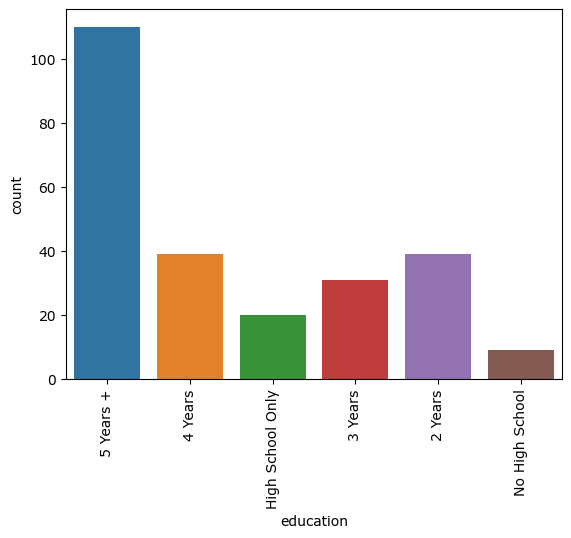

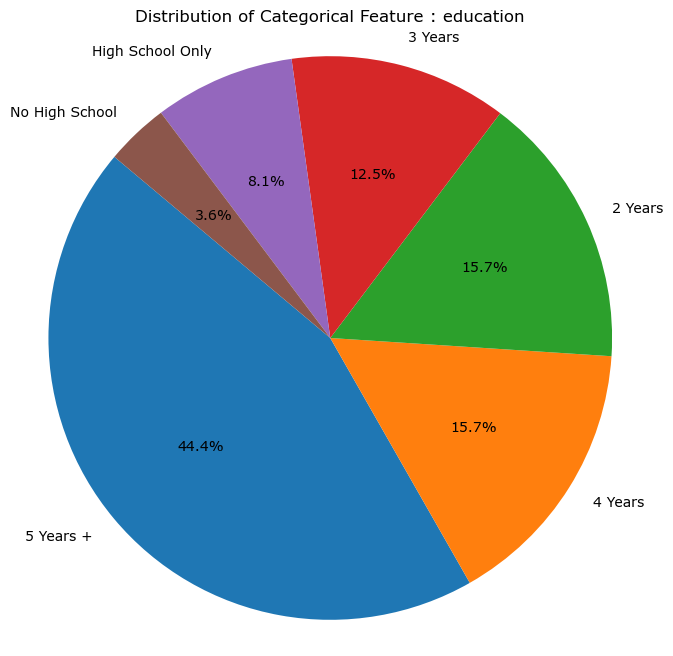

{'5 Years +': 110, '4 Years': 39, '2 Years': 39, '3 Years': 31, 'High School Only': 20, 'No High School': 9}

------------------------------





🔵 Feature : famstatus



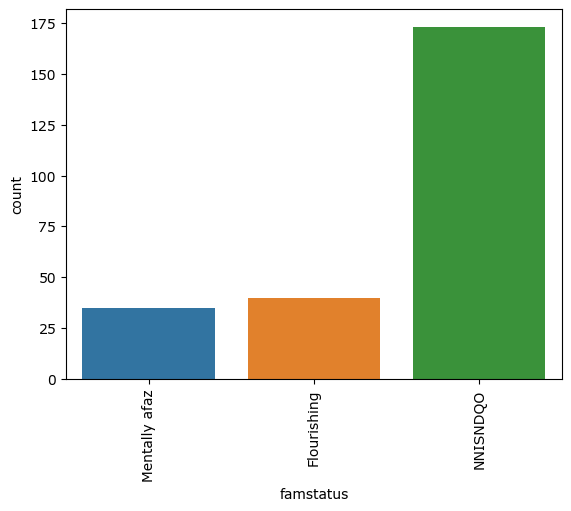

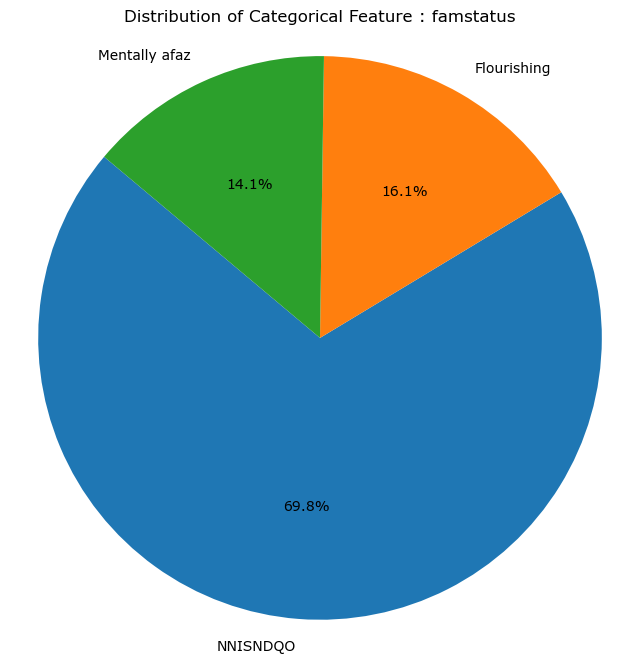

{'NNISNDQO': 173, 'Flourishing': 40, 'Mentally afaz': 35}

------------------------------





Finished! :D


In [35]:
categorical_features = datac.select_dtypes(include='object').columns

for c in categorical_features:
    # Create a count plot
    sns.countplot(data=datac, x=c)
    plt.xticks(rotation=90)
    print(f"🔵 Feature : {c}\n")
    plt.show()
    
    print()
    
    # Create a pie chart
    pie_data = datac[c].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Distribution of Categorical Feature : {c}")
    plt.show()
    
    # Print value counts as a dictionary
    print(pie_data.to_dict())
    print("\n------------------------------\n\n\n\n\n")

print("Finished! :D")

🔵 Feature : education

{'5 Years +': 110, '4 Years': 39, '2 Years': 39, '3 Years': 31, 'High School Only': 20, 'No High School': 9}


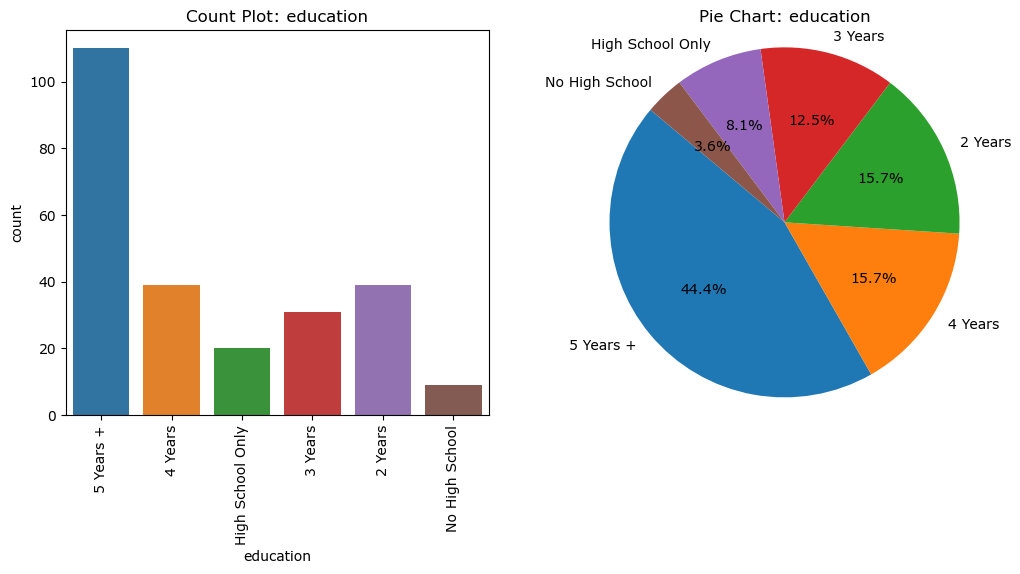


------------------------------





🔵 Feature : sex

{'Female': 151, 'Male': 97}


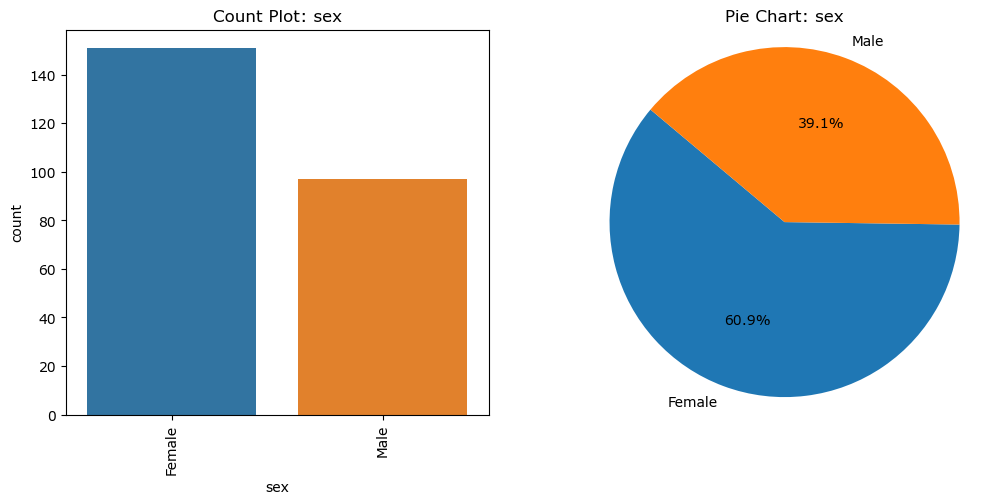


------------------------------





🔵 Feature : famstatus

{'Sad': 173, 'Happy': 40, 'Medium': 35}


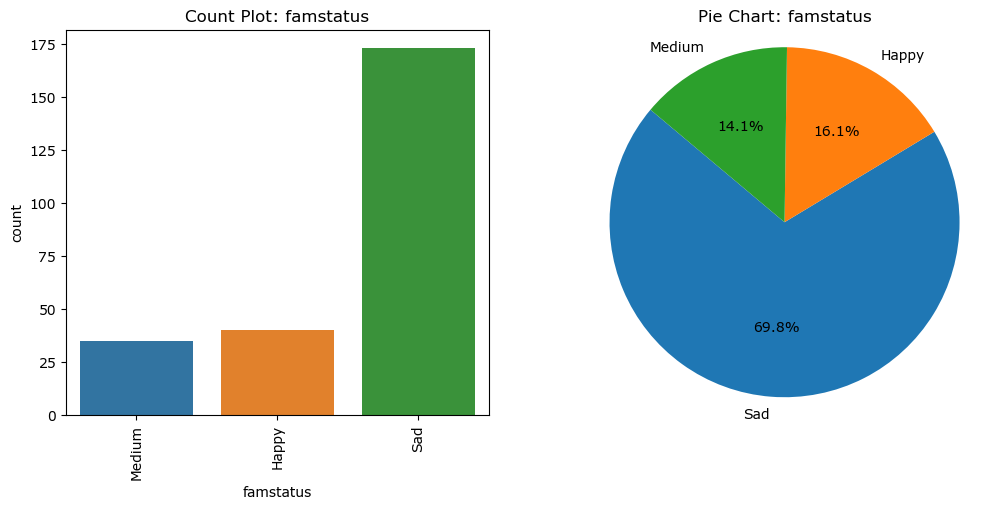


------------------------------





🔵 Feature : pro_cat

{'Divorced': 159, 'Married': 51, 'Single': 38}


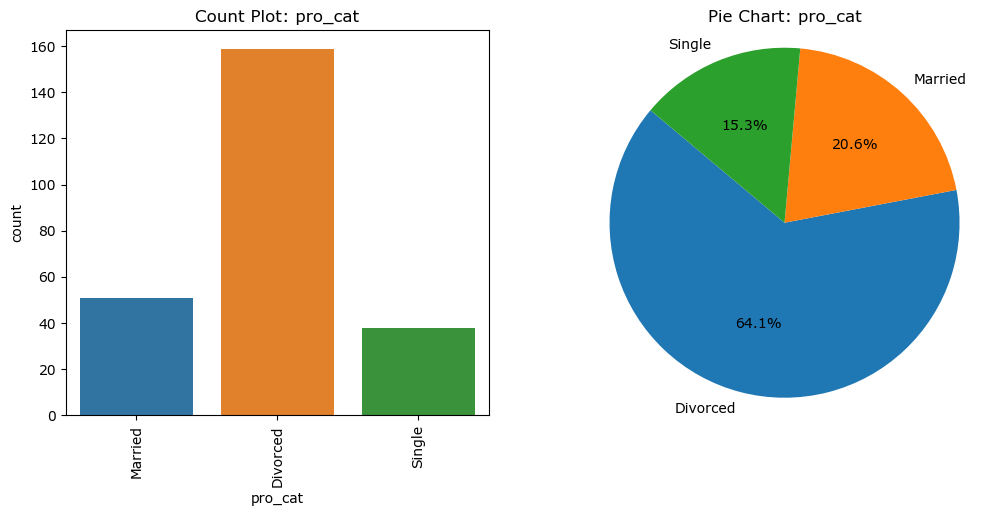


------------------------------





Finished! :D


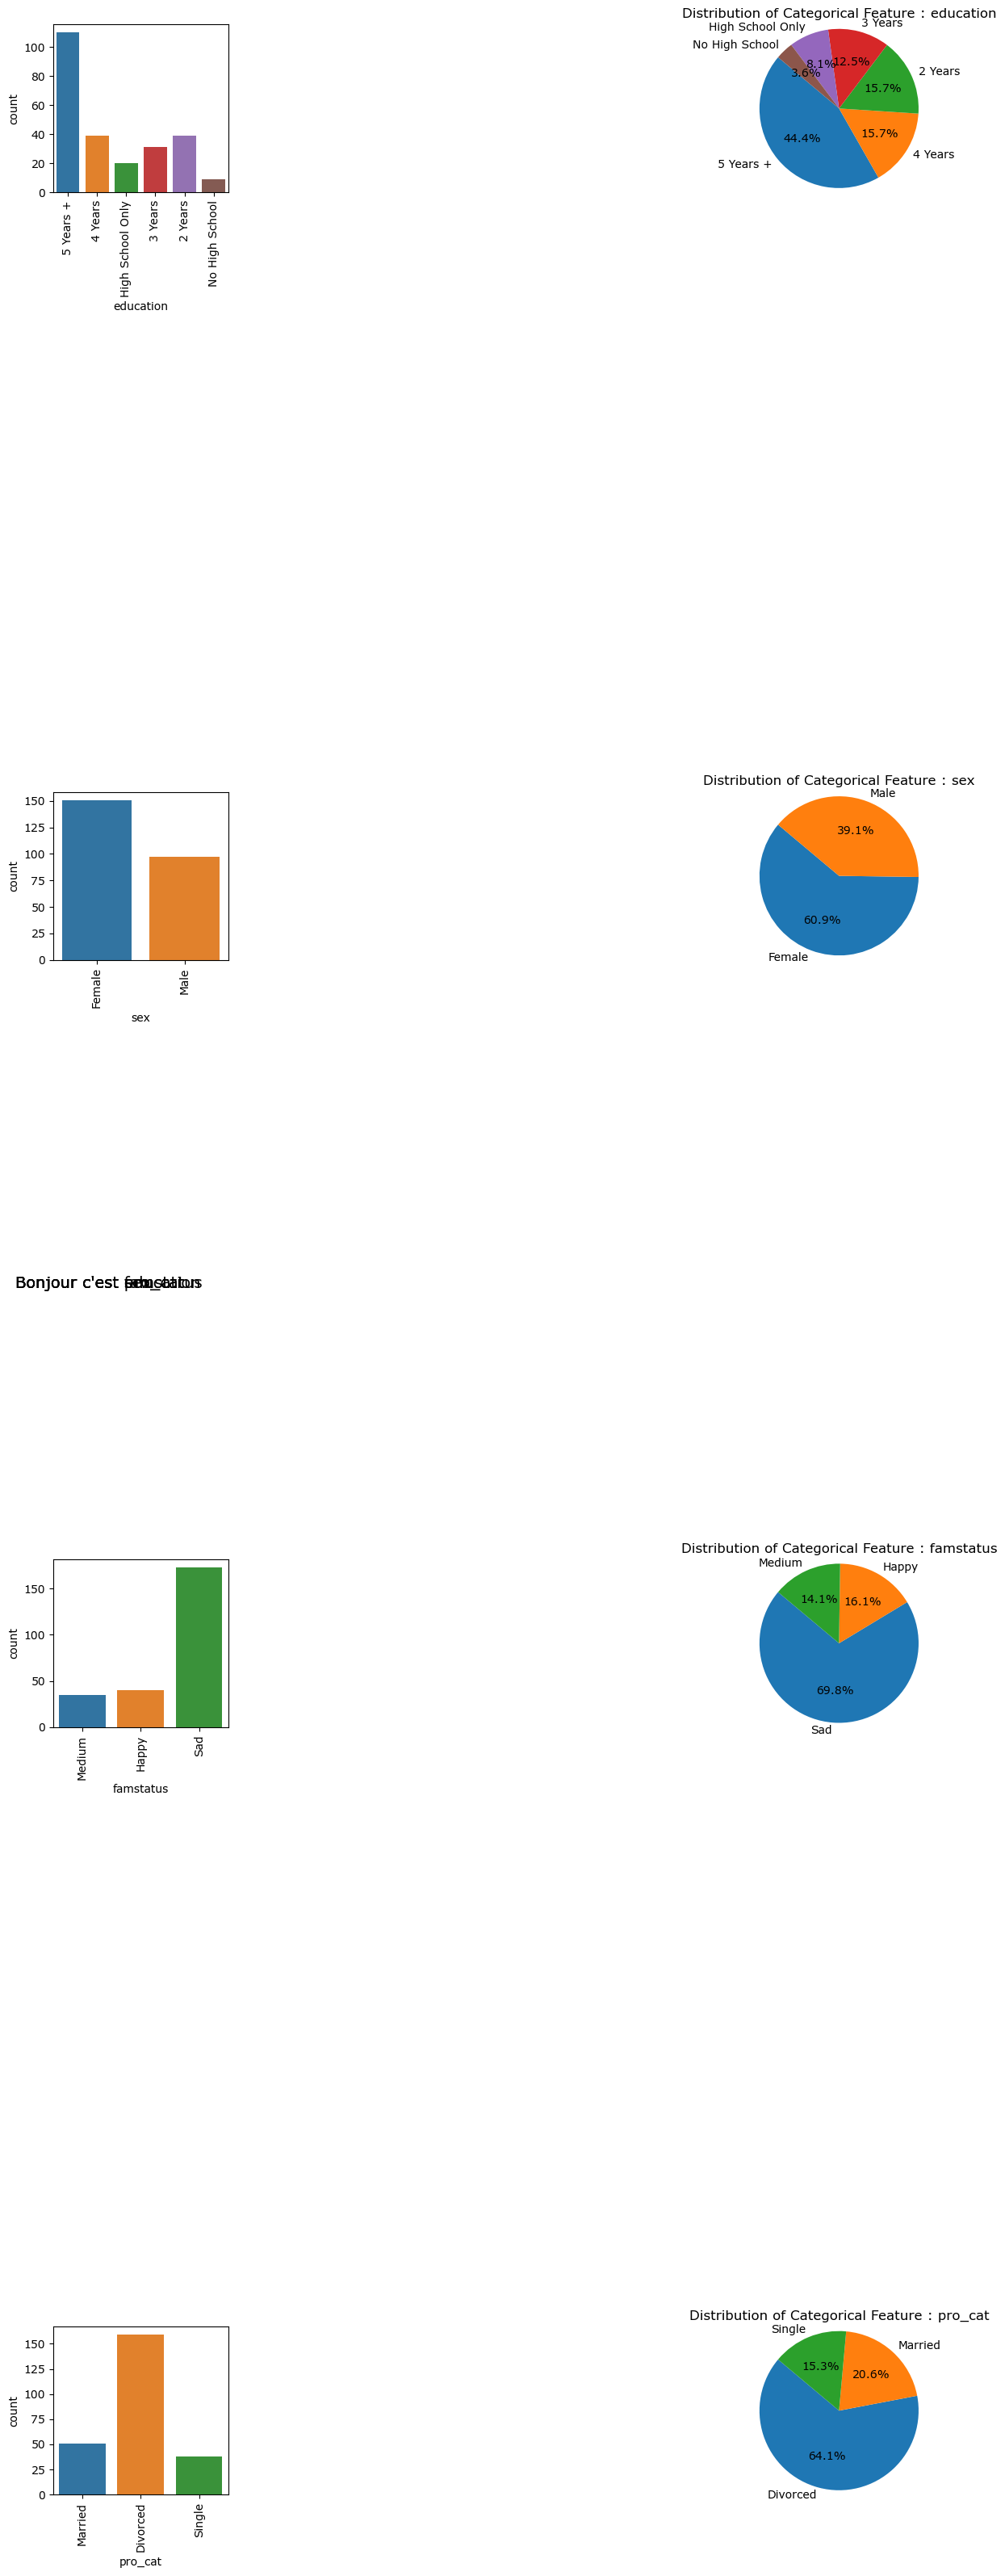

In [39]:
categorical_features = datac.select_dtypes(include='object').columns

# Create a list to store all plots
all_plots = []

for c in categorical_features:
    # Create a new figure for each category
    plt.figure(figsize=(12, 5))

    # Create a count plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=datac, x=c)
    plt.xticks(rotation=90)
    plt.title(f"Count Plot: {c}")

    # Create a pie chart
    plt.subplot(1, 2, 2)
    pie_data = datac[c].value_counts()
    plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Pie Chart: {c}")

    # Append the current plot to the list
    all_plots.append(plt.gcf())

    # Print value counts as a dictionary
    print(f"🔵 Feature : {c}\n")
    print(pie_data.to_dict())
    plt.show()
    print("\n------------------------------\n\n\n\n\n")

    

# Combined plot chart
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(12, len(categorical_features) * 8))

# Loop through categorical features
for i, c in enumerate(categorical_features):
    # Create a count plot
    sns.countplot(data=datac, x=c, ax=axes[i][0])
    axes[i][0].set_xticklabels(axes[i][0].get_xticklabels(), rotation=90)
    
    # Create a pie chart
    pie_data = datac[c].value_counts()
    axes[i][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    axes[i][1].axis('equal')
    axes[i][1].set_title(f"Distribution of Categorical Feature : {c}")
    

# Adjust spacing between subplots
plt.tight_layout()

# Save the combined plot to the specified output directory
output_filename = "combined_categorical_plots.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)
#plt.close()
    
    

print("Finished! :D")

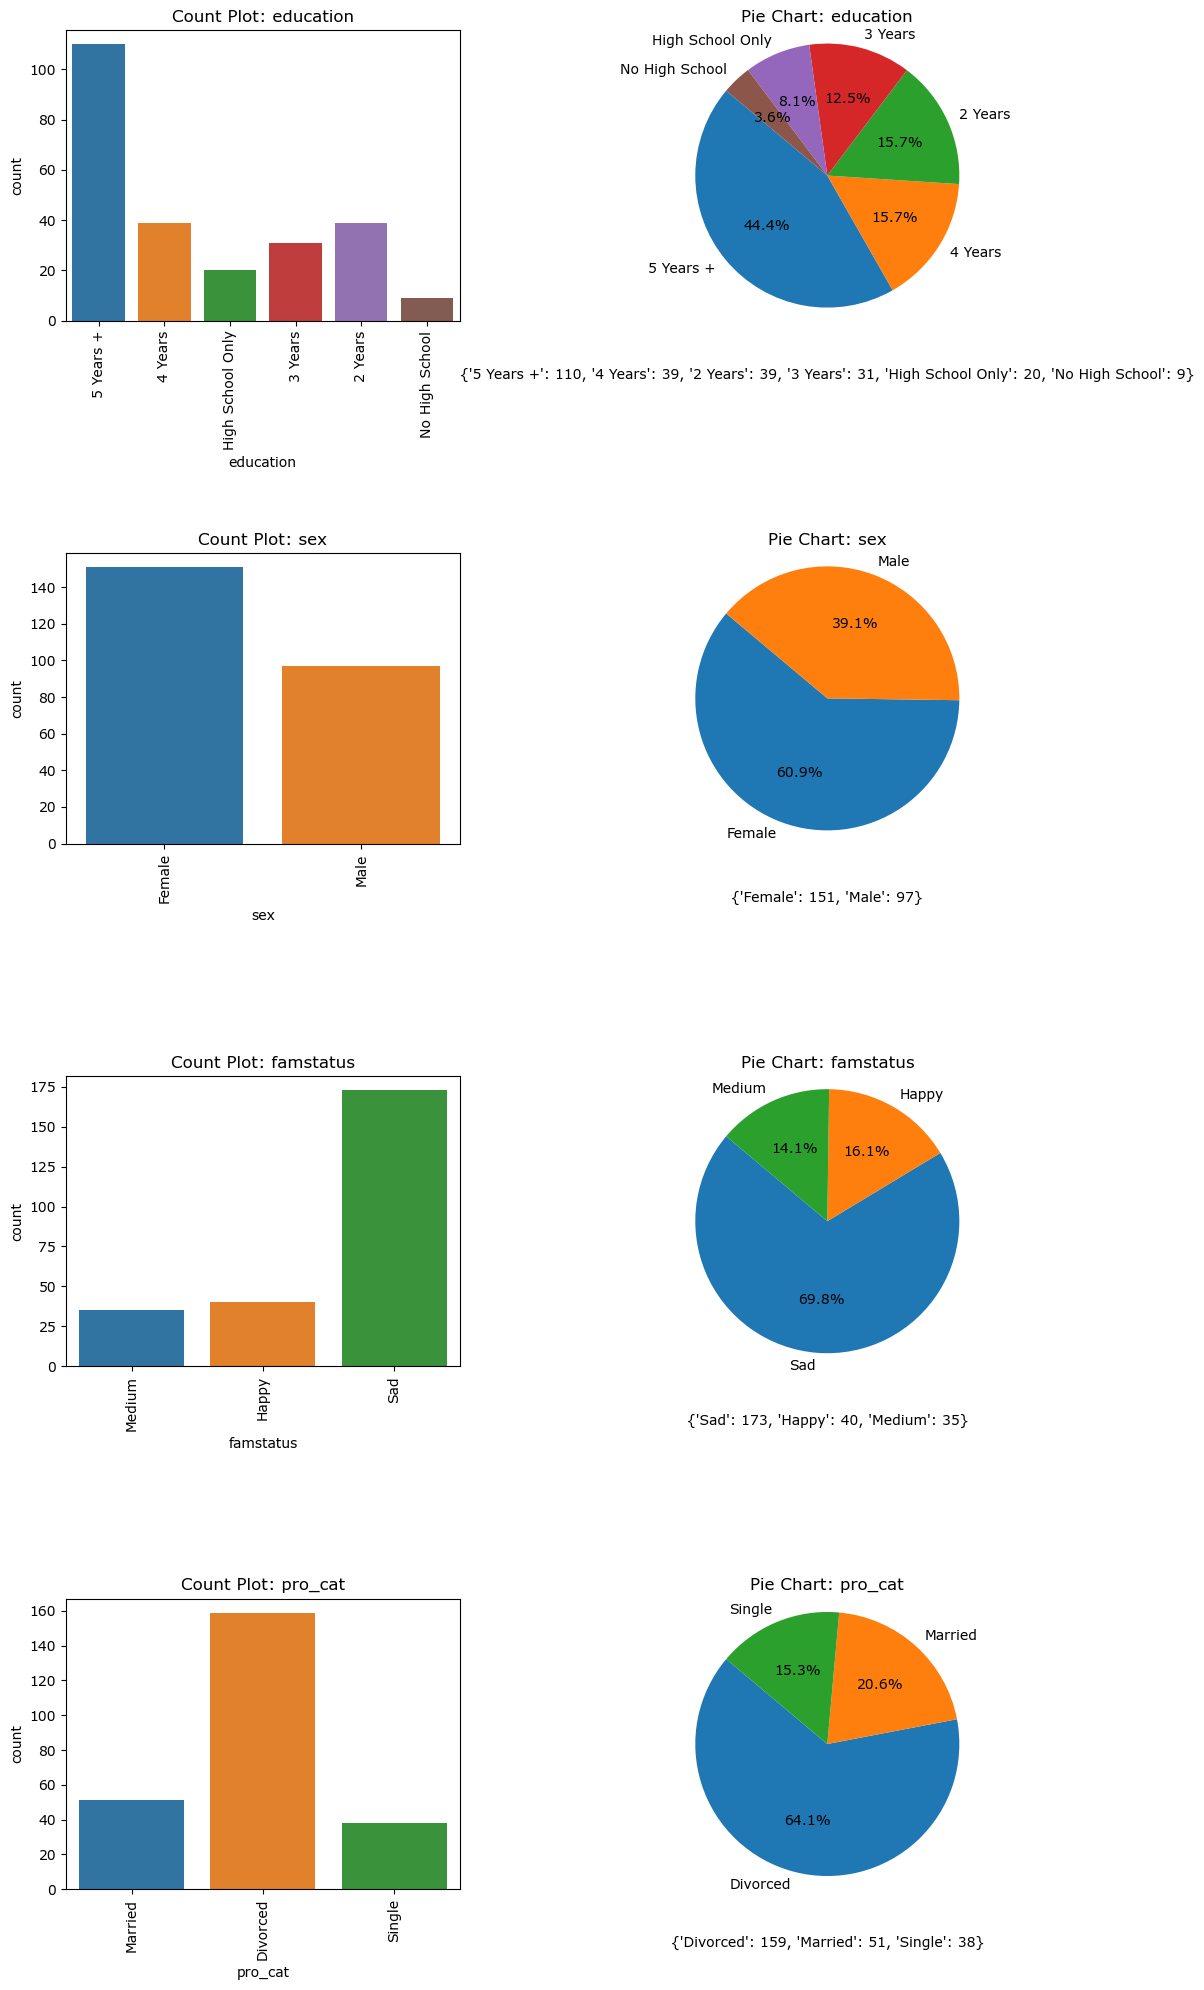

In [56]:
# Combined plot chart
fig, axes = plt.subplots(len(categorical_features), 2, figsize=(12, len(categorical_features) * 5))


# Loop through categorical features
for i, c in enumerate(categorical_features):
    # Create a count plot
    sns.countplot(data=datac, x=c, ax=axes[i][0])
    axes[i][0].set_xticklabels(axes[i][0].get_xticklabels(), rotation=90)
    
    # Create a pie chart
    pie_data = datac[c].value_counts()
    axes[i][1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
    axes[i][1].axis('equal')
    axes[i][0].set_title(f"Count Plot: {c}")
    axes[i][1].set_title(f"Pie Chart: {c}")
    
    # Add text below the plots
    axes[i][1].text(0.5, -0.2, pie_data.to_dict(), transform=axes[i][1].transAxes, ha='center')

# Adjust spacing between subplots

plt.tight_layout()
plt.subplots_adjust(hspace = 0.8)
# Save the combined plot to the specified output directory
output_filename = "combined_categorical_plots.png"
output_path = os.path.join(output_dir, output_filename)
plt.savefig(output_path)

# Step 3 - Bivariate Analysis WIP

## 3.1 - Numerical Bivariate Analysis

In [ ]:
#Creating a correlation map between the numerical features
corr_matrix = datac.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, linewidths=.5, cbar=True, square=True, annot=True, fmt=".2f")
plt.title("Features correlation matrix")

In [ ]:
sns.pairplot(datac, kind='reg', corner=True)

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define the modified corrfunc function
def corrfunc(x, y, **kwds):
    cmap = plt.get_cmap('coolwarm')
    norm = plt.Normalize(vmin=-1, vmax=1)
    ax = plt.gca()
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
    r, _ = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"r={r:.2f}", xy=(.5, .5), xycoords=ax.transAxes,
                color='white' if lightness < 0.7 else 'black', size=26, ha='center', va='center')

g = sns.PairGrid(datac)
g.map_lower(sns.regplot, scatter_kws={'s': 10})
g.map_diag(sns.histplot, kde=False)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0.06, hspace=0.06)  # Equal spacing in both directions
plt.show()

## 3.2 - Categorical Bivariate Analysis WIP

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

categorical_features = datac.select_dtypes(include='object').columns

for c1 in categorical_features:
    for c2 in categorical_features:
        if c1 != c2:
            print(f"🔵 Features: {c1} vs. {c2}\n")

            # Create contingency table
            contingency_table = pd.crosstab(datac[c1], datac[c2])

            # Chi-Square Test of Independence
            chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
            print(" * Chi-Square Test of Independence:")
            print("   - Chi-Square Value:", chi2)
            print("   - p-value:", p_chi2)

            # Plot the contingency table
            plt.figure(figsize=(8, 8))
            sns.heatmap(contingency_table, cmap="coolwarm", square=True, annot=True, fmt=".2f")
            plt.xlabel(c2)
            plt.ylabel(c1)
            plt.show()

            print("\n------------------------------\n\n\n\n")

print("Finished! :D")